In [1]:
import pandas as pd
import numpy as np


In [2]:
url =  "https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/digit_recognizer_train.csv"
df = pd.read_csv(url)
df.shape

(42000, 785)

In [3]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
4244      2       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
4244       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
4244         0         0         0         0  

[1 rows x 785 columns]

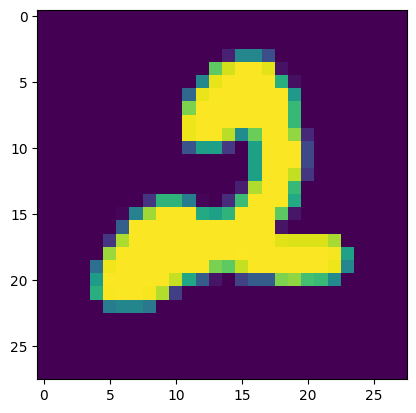

In [6]:
# lets check how the image is 
import matplotlib.pyplot as plt
plt.imshow(df.iloc[4244,1:].values.reshape(28,28))

In [7]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)


7.444598197937012


In [11]:
# calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
# Lets use PCA and reduce the dimensionality of the dataset and compare the accuracy with original features dataset


In [12]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
print(f"X_train shape : {X_train.shape} and X_train_trf shape : {X_train_trf.shape}")
print(f"X_test shape : {X_test.shape} and X_test_trf shape : {X_test_trf.shape}")

X_train shape : (33600, 784) and X_train_trf shape : (33600, 100)
X_test shape : (8400, 784) and X_test_trf shape : (8400, 100)


In [14]:
# Apply knn on transformed dataset

knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [15]:
start = time.time()
y_pred_100 = knn.predict(X_test_trf)
print(time.time() - start)

0.3442220687866211


In [16]:
# checking accuracy score
accuracy_score(y_test,y_pred_100)

0.9538095238095238

## Visualize the data using PCA

In [17]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_vis = pca.fit_transform(X_train)
X_test_vis = pca.transform(X_test)
print(f"X_train_vis shape : {X_train_vis.shape}")
print(f"X_test_vis shape : {X_test_vis.shape}")

X_train_vis shape : (33600, 2)
X_test_vis shape : (8400, 2)


In [19]:
import plotly.express as px
y_train_trf  = y_train.astype(str)
fig = px.scatter(x=X_train_vis[:,0],
                 y=X_train_vis[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [20]:
# Visualize in 3D
pca=PCA(n_components=3)
X_train_vis_3D = pca.fit_transform(X_train)
X_test_vis_3D = pca.transform(X_test)

In [21]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_vis_3D[:,0],y=X_train_vis_3D[:,1],z=X_train_vis_3D[:,2],color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [22]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023396, 26.74459617])

In [24]:
pca.components_
pca.components_.shape
#Eigen vectors 

(3, 784)

In [25]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [26]:
# lets find out the features that are contributing to cumulative sum of eigan values that can explain 90% of the variance

pca=PCA(n_components=None)
X_train_trf_P = pca.fit_transform(X_train)
X_test_trf_p = pca.transform(X_test)

In [27]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [29]:
pca.components_.shape

(784, 784)

In [30]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

The curve hits 0.9 at approx x = 222.8364120392793


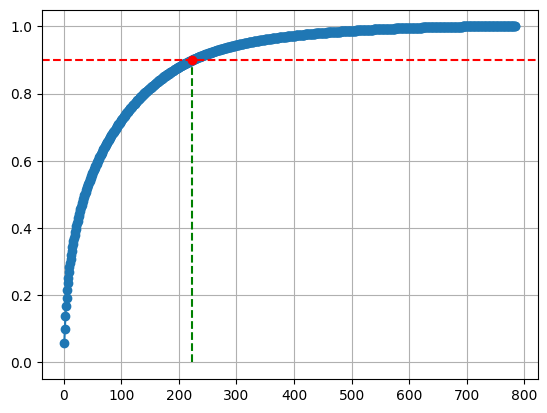

In [43]:
y=np.cumsum(pca.explained_variance_ratio_)
x=np.arange(1,len(y) + 1)
plt.plot(x,y,marker='o')
plt.grid()
plt.axhline(y=0.9,color='r',linestyle='--')
from scipy import interpolate
f = interpolate.interp1d(y,x,kind='linear',fill_value="extrapolate")
x_at_09 = f(0.9)
# vertical line
plt.vlines(x=x_at_09,ymin=0,ymax=0.9,color='g',linestyle='--')
print(f"The curve hits 0.9 at approx x = {x_at_09}")
plt.plot(x_at_09,0.9,'ro')
plt.show()